<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#TJ-hackaton" data-toc-modified-id="TJ-hackaton-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>TJ hackaton</a></span><ul class="toc-item"><li><span><a href="#If-you-want-to-actual-encode-ms-timestamps..." data-toc-modified-id="If-you-want-to-actual-encode-ms-timestamps...-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>If you want to actual encode ms timestamps...</a></span></li><li><span><a href="#Scrap" data-toc-modified-id="Scrap-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Scrap</a></span></li></ul></li><li><span><a href="#Misc-audio-gen" data-toc-modified-id="Misc-audio-gen-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Misc audio gen</a></span><ul class="toc-item"><li><span><a href="#Timed-bleeps" data-toc-modified-id="Timed-bleeps-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Timed bleeps</a></span></li><li><span><a href="#Recognizable-sounds" data-toc-modified-id="Recognizable-sounds-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Recognizable sounds</a></span></li></ul></li><li><span><a href="#Encoding-timestamps-vertically-(hard-to-do)" data-toc-modified-id="Encoding-timestamps-vertically-(hard-to-do)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Encoding timestamps vertically (hard to do)</a></span></li></ul></div>

In [25]:
from __future__ import division
from numpy import *
import matplotlib.pylab as plt
from agen.gen.diagnosis_sounds import mk_sounds_with_timed_bleeps
from agen.gen.diagnosis_sounds import WfGen, TimeSound, BinarySound, slow_mask
from agen.sound.audio import Sound

# TJ hackaton

In [79]:
from __future__ import division
from hum.gen.diagnosis_sounds import WfGen, TimeSound, BinarySound, slow_mask
import librosa
from scipy.signal import convolve
from ut.util import uiter

{'repetition': 3, 'redundancy': 141, 'word_size_frm': 150, 'phrase_data_frm': 21150}


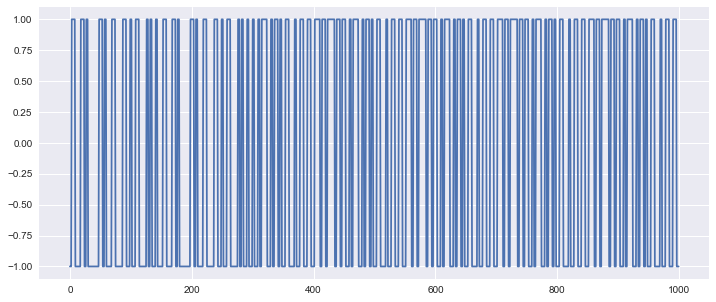

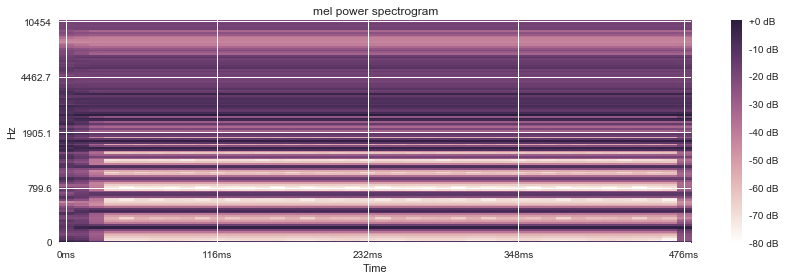

In [80]:
nbits=50
bs = BinarySound.for_audio_params(
    nbits=nbits, freq=6000, chk_size=43008, sr=44100, header_size_words=2)

utc = randint(0, 2, nbits)
wf = bs.mk_phrase(utc)
print(bs)
figure(figsize=(12,5)); plot(wf[:1000]);
Sound(wf=wf, sr=bs.sr).display()

In [81]:
decoded_wf = bs.decode(wf)
print(utc)
print(decoded_wf)
print("alice and bob agree: {}".format(all(utc == decoded_wf)))

[1 0 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 1
 0 1 1 0 1 1 1 1 0 1 1 0 1]
[1 0 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 1
 0 1 1 0 1 1 1 1 0 1 1 0 1]
alice and bob agree: True


Header position: 0
alice and bob agree: True


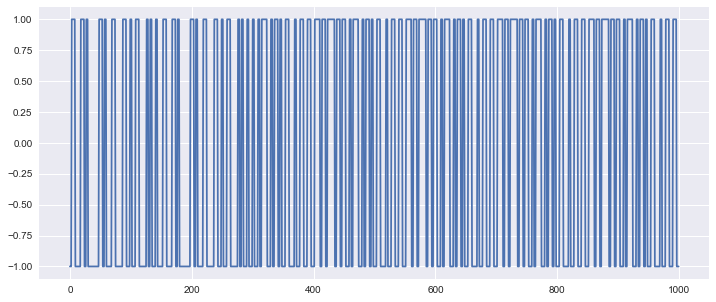

In [82]:
noise_ratio = 1  # proportion of bits to flip
lidx = rand(len(wf)) > noise_ratio
wff = wf.copy()
wff[lidx] = -wff[lidx]
figure(figsize=(12,5)); plot(wff[:1000])
print("Header position: {}".format(bs.header_position(wff)))

decoded_wf = bs.decode(wf)
print("alice and bob agree: {}".format(all(utc == decoded_wf)))

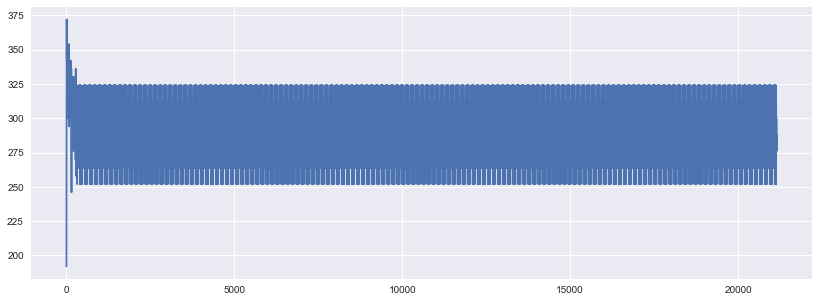

In [83]:
w = slow_mask(wff, bs.header_word)
figure(figsize=(14,5)); plot(w);

Header position: 12569
alice and bob agree: False


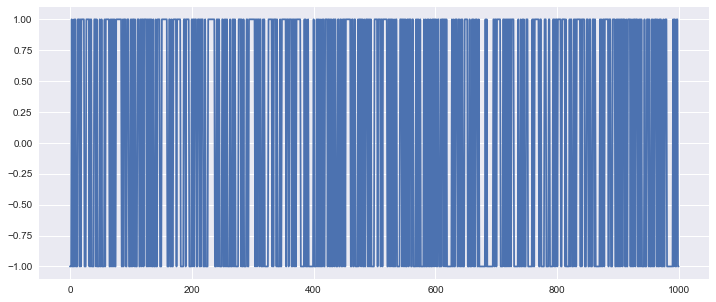

In [90]:
noise_ratio = 0.5  # proportion of bits to flip
lidx = rand(len(wf)) > noise_ratio
wff = wf.copy()
wff[lidx] = -wff[lidx]
figure(figsize=(12,5)); plot(wff[:1000])
print("Header position: {}".format(bs.header_position(wff)))

decoded_wf = bs.decode(wff)
print("alice and bob agree: {}".format(all(utc == decoded_wf)))

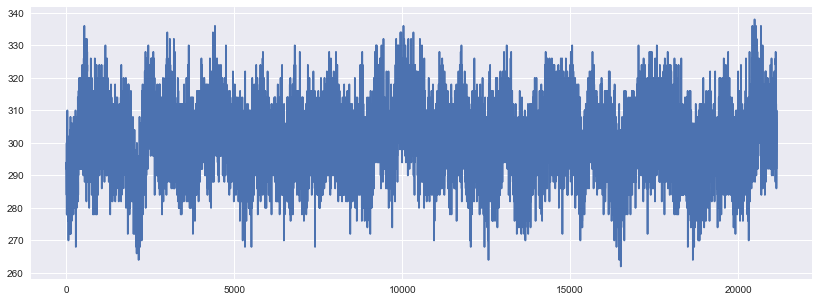

In [91]:
w = slow_mask(wff, bs.header_word)
figure(figsize=(14,5)); plot(w);

## If you want to actual encode ms timestamps...

In [41]:
def ums_to_01_array(ums, n_ums_bits=bs.nbits):
    ums_bits_str_format = "{:0" + str(n_ums_bits) + "b}"
    return array(map(lambda x: int(x == '1'), ums_bits_str_format.format(ums)))

utc = ums_to_01_array(int(utime.utcnow_ms()))
utc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0])

In [46]:
import time
for i in arange(5):
    time.sleep(0.3)
    utc = ums_to_01_array(int(utime.utcnow_ms()))
    print(utc[20:])

[1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0 1 0 1]
[1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1]
[1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1]
[1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0]
[1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0]


## Scrap

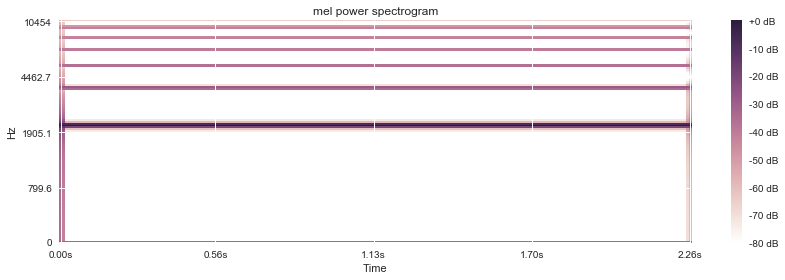

In [141]:
wf = WfGen().mk_sine_wf(100000, 3000)
s = Sound(wf, sr=44100)
s.display()

# Misc audio gen

In [93]:
from hum.gen.diagnosis_sounds import mk_sounds_with_timed_bleeps

## Timed bleeps

In [94]:
wf = mk_sounds_with_timed_bleeps(array([0, 0.5, 1, 2]) * 1000, sr=44100)

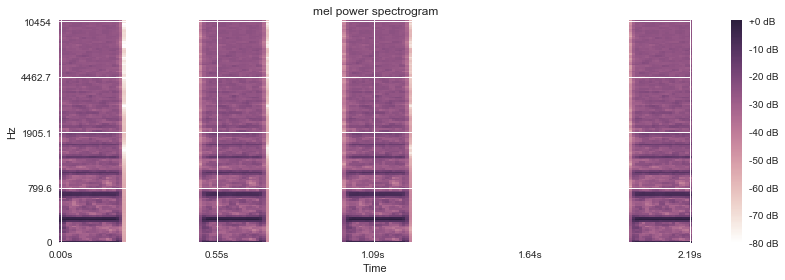

In [95]:
s = Sound(wf=wf, sr=44100)
s.display()

## Recognizable sounds

In [27]:
from oto.utils.ipython_imports import *
import ut.util.time as utime
import librosa

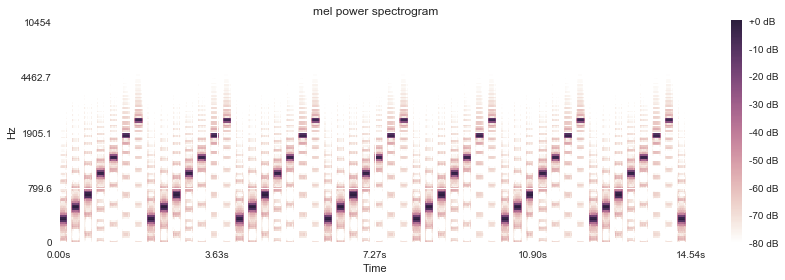

In [28]:
sound_folder = 'sounds/test_sounds/'

test_sound_filepath = os.path.join(sound_folder, 'test_sound_every_10th_freq.wav')
test_sound_filepath = os.path.join(sound_folder, 'test_sound_C__50_length_beep_every_100.wav')
test_sound_filepath = os.path.join(sound_folder, 'test_sound_D__7_increasing_notes.wav')

test_sound = Sound.from_file(test_sound_filepath)
test_sound.display()

In [29]:
bpm, _ = librosa.beat.beat_track(test_sound.wf, sr=test_sound.sr)
bpm

103.359375

# Encoding timestamps vertically (hard to do)

In [92]:
from ut.sound.others import audio_tools
import librosa

In [82]:
wf_gen = WfGen(sr=44100, buf_size_frm=2048)

In [83]:
wf_gen.mk_sine_wf(n_frm=4400)

array([ 0.        ,  0.03132416,  0.06252526, ..., -0.10046918,
       -0.06958655, -0.03843054])

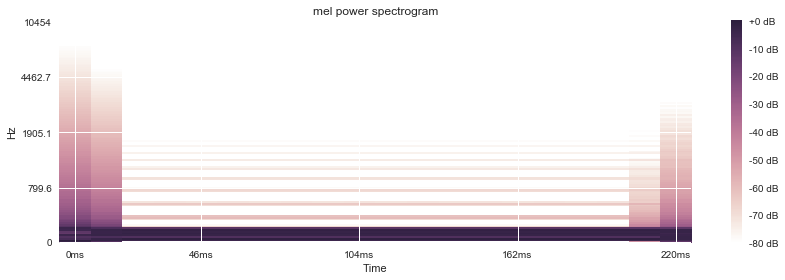

In [86]:
wf = wf_gen.mk_wf_from_freq_weight_array(10000, [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])
Sound(wf).display()

In [85]:
self = TimeSound(sr=44100, buf_size_frm=2048)

In [95]:
wf = self.timestamped_wf(offset_ums=0, n_bufs=21, n_bufs_per_tick=1)
s = Sound(wf, self.sr)

In [97]:
s.save_to_wav('timestamp_sound.wav')


0.975238095238 seconds


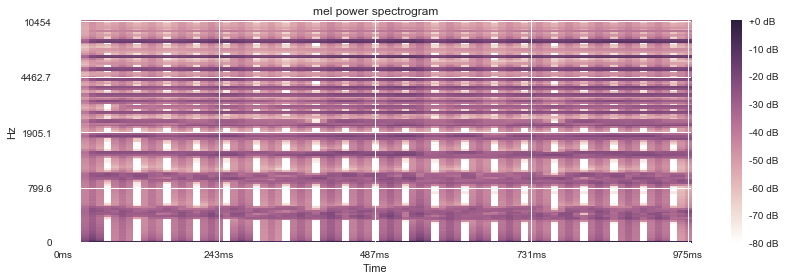

In [96]:
print("{} seconds".format(s.duration()))
s.display()

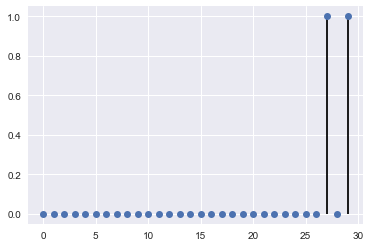

In [229]:
t = self.ums_to_01_array(5)
vlines(t);

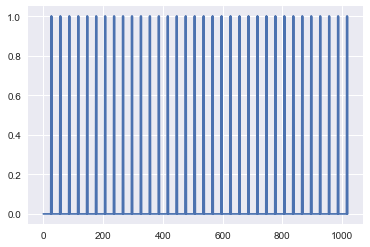

In [230]:
t = self.freq_weight_array_for_ums(10)
plot(t)

(42, 1024)


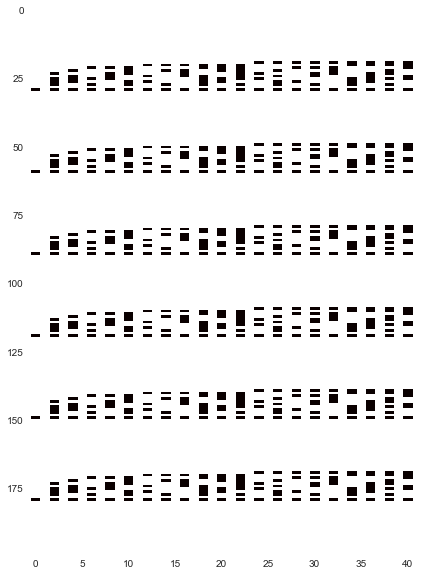

In [279]:
X = self.spectr_of_time(offset_ums=1, n_bufs=21, n_bufs_per_tick=2)
print(X.shape)
heatmap(X.T[:199,:], figsize=(7,10));

In [233]:
repeat(X, 30, axis=0).shape

(1260, 1024)

In [234]:
w = audio_tools.invert_pretty_spectrogram(repeat(X, 30, axis=0) * 10, 
                                          fft_size=2048, log=False, step_size=128)

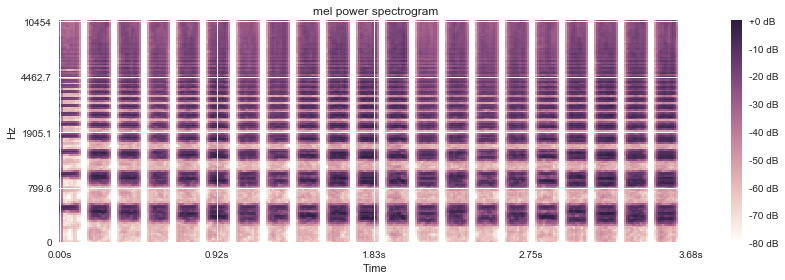

In [235]:
Sound(w).display()

In [236]:
S = abs(librosa.stft(w, 
                     n_fft=self.buf_size_frm, 
                     hop_length=self.buf_size_frm))
S.shape

(1025, 80)

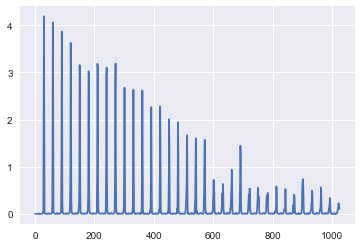

In [274]:
plot(S[:, 1])

In [238]:
# print("".join(map(str, t.astype(int))))

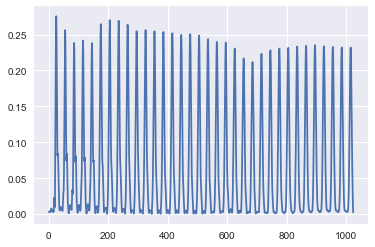

In [239]:
t = S[:, 10]
# t /= t.max()
# t = t > 0.1
plot(t)

34

(34, 30)


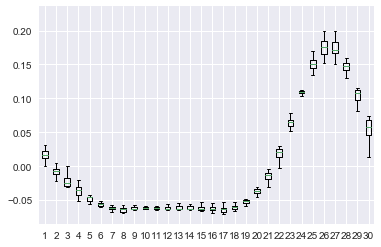

In [282]:
tt = t[:(30*(t.shape[0] // 30))].reshape((-1, 30))
print(tt.shape)
# ttt = (tt.T / tt.T.max(axis=0)).T
ttt = (tt.T - tt.T.mean(axis=0)).T
boxplot(ttt);

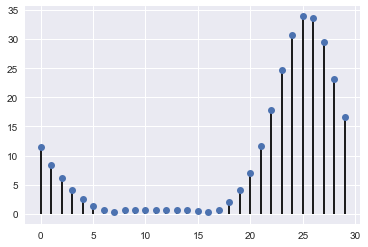

In [260]:
vlines(ttt.sum(axis=0))

In [256]:
q = arange(12).reshape((4,3))
print q
(q.T / q.T.max(axis=0)).T

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


array([[ 0.        ,  0.5       ,  1.        ],
       [ 0.6       ,  0.8       ,  1.        ],
       [ 0.75      ,  0.875     ,  1.        ],
       [ 0.81818182,  0.90909091,  1.        ]])

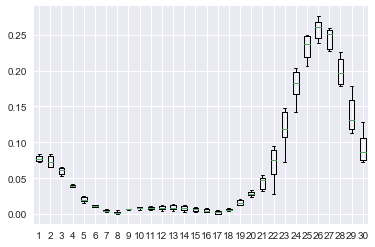

In [240]:
boxplot(t[:(30*10)].reshape((-1, 30)));

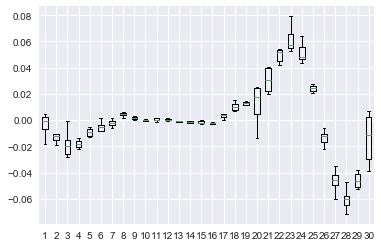

In [242]:
boxplot(diff(t[:(30*10 + 1)]).reshape((-1, 30)));

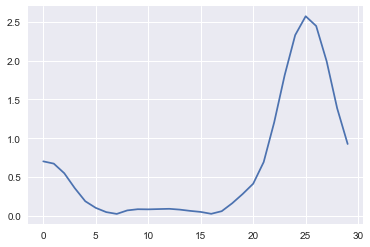

In [241]:
plot(t[:(30*10)].reshape((-1, 30)).sum(axis=0))

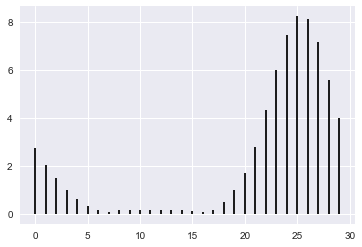

In [1044]:
tt = t[:(self.n_freqs_per_ums_bit * self.n_ums_bits)]
tt = tt.reshape((-1, self.n_ums_bits))
# heatmap(tt);
tt = tt.sum(axis=0)
vlines(arange(len(tt)), 0, tt)

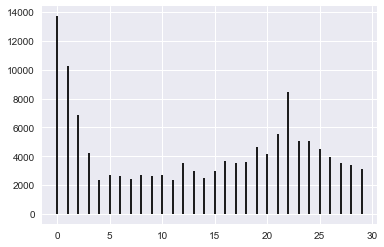

In [984]:
tt = t[:(self.n_freqs_per_ums_bit * self.n_ums_bits)]
tt = tt.reshape((-1, self.n_ums_bits))
# heatmap(tt);
tt = tt.sum(axis=0)
vlines(arange(len(tt)), 0, tt)

In [931]:
tt = S[:(self.n_freqs_per_ums_bit * self.n_ums_bits), :]
tt = tt.reshape((self.n_ums_bits, -1, tt.shape[1]))
tt.sum(axis=(1,2))

array([ 708.60162354,  712.18341064,  714.02355957,  693.02392578,
        707.64196777,  893.89648438,  898.21850586,  664.09802246,
        562.7600708 ,  545.55371094,  524.47015381,  500.31716919,
        526.86639404,  574.45788574,  537.56811523,  392.60147095,
        331.52032471,  328.19512939,  309.80557251,  316.88092041,
        374.74783325,  351.33630371,  301.22418213,  245.73088074,
        228.40422058,  228.4135437 ,  242.8269043 ,  264.61126709,
        307.2114563 ,  297.51885986], dtype=float32)

In [840]:
S.shape

(1025, 43)

In [841]:
S.max(axis=0).shape

(43,)

In [842]:
w = (S.T / S.max(axis=1).T).T
w

array([[  0.00000000e+00,   0.00000000e+00,   2.94684947e-01, ...,
          7.80937433e-01,   6.97181225e-01,   6.97297454e-01],
       [  0.00000000e+00,   0.00000000e+00,   4.75347012e-01, ...,
          7.92119563e-01,   6.97180986e-01,   6.97417974e-01],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00, ...,
          2.73863107e-01,   2.52956693e-06,   9.00223618e-04],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00, ...,
          2.86515474e-01,   5.34518989e-08,   2.06941105e-02],
       [  0.00000000e+00,   0.00000000e+00,   4.82281983e-01, ...,
          7.81725049e-01,   6.82796359e-01,   6.88004315e-01],
       [  0.00000000e+00,   0.00000000e+00,   2.98330486e-01, ...,
          7.70806253e-01,   6.82796359e-01,   6.85400367e-01]], dtype=float32)

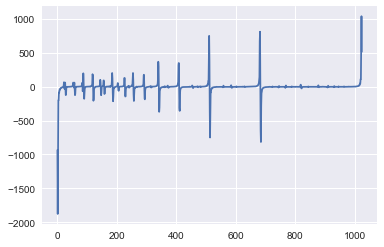

In [849]:
plot(diff(S[:, 2]))

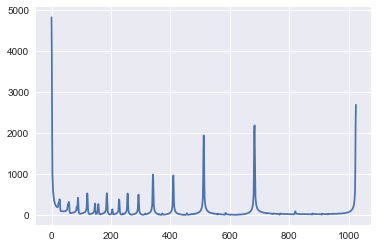

In [848]:
plot(S[:, 2])

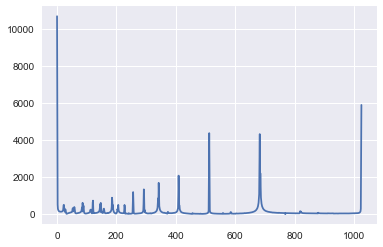

In [845]:
plot(S[:, 10])

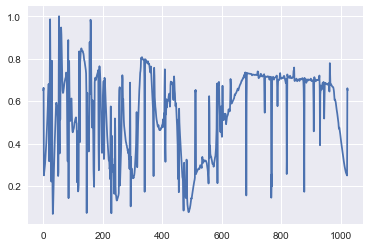

In [844]:
plot(w[:, 10])

In [642]:
wf = list()
for i in xrange(0, 1000, 20):
    wf.extend(list(mk_sine_wave_wf(buf_size_frm, look_up_tables[i])))
wf = array(wf)

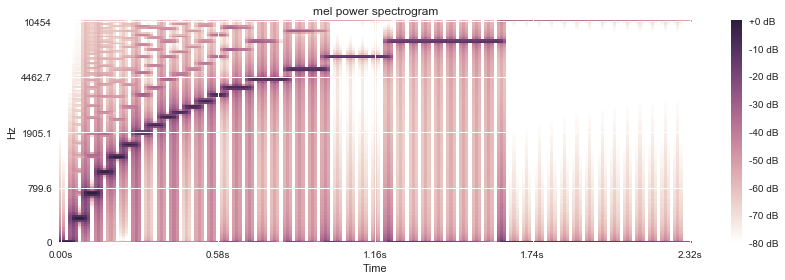

In [643]:
Sound(wf=wf).display()